In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#from langdetect import detect

## Set up, load data, and clean

add language for each text excerpts, filter out non-English excerpts.

In [ ]:
data_dir = "/Users/yingli/Development/TopicsInDataScience/"
sdg_names = pd.read_csv(data_dir + "sdg_name_definition.csv")

text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)
#text_df["lang"] = text_df["text"].apply(lambda x: detect(x))
#text_df = text_df.query("lang == 'en'")
#text_df.reset_index(inplace=True,drop=True)

In [3]:
sdg_names.iloc[0]

sdg                                                     1
sdg_name                                       No Poverty
sdg_definition    End poverty in all its forms everywhere
Name: 0, dtype: object

In [4]:
text_df.shape

(26526, 6)

## Tokenization of documents using sklearn

In [5]:
corpus = text_df.text
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(corpus)
count_vector = count_vectorizer.transform(corpus).toarray() 
count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
term_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq" : count_vector_df.sum(axis=0)})
term_freq.sort_values(by="freq", ascending=False)

,term,freq
countries,countries,8498
women,women,6019
development,development,5891
public,public,4820
social,social,4759
...,...,...
madrepora,madrepora,1
madisonian,madisonian,1
madin,madin,1
madhya,madhya,1


### looking at language models and feature for the task of document classification
 - split the data into train and test
 - construct text feature vectors using 
  - CountVectorizer, TfidfVectorizer
  - with unigram, bigram, and unigram and bigram combined
 - use Naive Bayes - multinomialNB implementation to assess the feature vectors' effectiveness
 - inspect the top informative features (tokens)

In [6]:
corpus = text_df.text
sdg_num = text_df.sdg
X_train, X_test, y_train, y_test = \
    train_test_split(corpus, sdg_num, test_size=0.33, random_state=7)

### using count vectors as feature and use multinomialNB

features = bigrams (ngram_range = (2,2))

remove stop words (stop_words = "english")

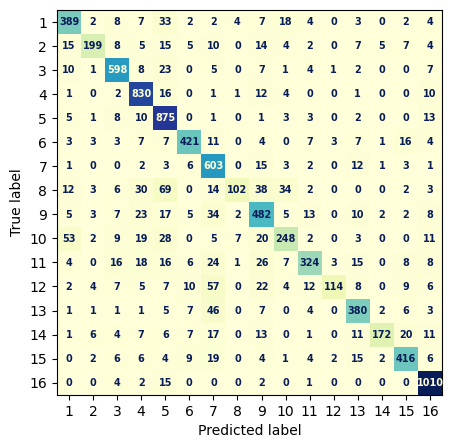

In [7]:
X_train_count_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_count_vectorizer.fit(X_train) 
X_train_count_vector = X_train_count_vectorizer.transform(X_train) 
X_test_count_vector = X_train_count_vectorizer.transform(X_test) 

count_multinomialNB_clf = MultinomialNB().fit(X_train_count_vector, y_train)
y_pred = count_multinomialNB_clf.predict(X_test_count_vector)
fig, ax = plt.subplots(figsize=(15, 5))
font = {'family': 'sans-serif', 'weight': 'heavy','size': 7,}
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax, cmap=mpl.colormaps["YlGnBu"],colorbar=None)


 - understanding metrics in the context of multiple classes

In [8]:
# manually check precision for sdg 1
tp = 389
fp = 113 #(summing vertically below 389)
fn = 96 #(summing horizentally to the right of 398)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) /(precision + recall)

In [9]:
print('precision for SDG 1: {:.4}'.format(precision))
print('recall for SDG 1: {:.4}'.format(recall))
print('f1 for SDG 1: {:.4}'.format(f1))

precision for SDG 1: 0.7749
recall for SDG 1: 0.8021
f1 for SDG 1: 0.7882


 - inspecting (and comparing) performance through classification_report
 - looking at row #1 for SDG 1, it should match with above numbers

In [10]:
print(metrics.classification_report(y_test,y_pred, digits = 4))

              precision    recall  f1-score   support

           1     0.7749    0.8021    0.7882       485
           2     0.8767    0.6633    0.7552       300
           3     0.8705    0.8966    0.8833       667
           4     0.8469    0.9453    0.8934       878
           5     0.7682    0.9490    0.8491       922
           6     0.8808    0.8471    0.8636       497
           7     0.7102    0.9248    0.8035       652
           8     0.8718    0.3238    0.4722       315
           9     0.7151    0.7799    0.7461       618
          10     0.7470    0.6093    0.6712       407
          11     0.8416    0.6807    0.7526       476
          12     0.9268    0.4270    0.5846       267
          13     0.7983    0.8190    0.8085       464
          14     0.9297    0.6232    0.7462       276
          15     0.8473    0.8387    0.8430       496
          16     0.9107    0.9768    0.9426      1034

    accuracy                         0.8183      8754
   macro avg     0.8323   

 - inspect individual scores

In [11]:
print("accuracy = {:.4}".format(metrics.accuracy_score(y_test, y_pred)))
print("macro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'macro')))
print("micro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'micro')))
print("macro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'macro')))
print("micro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'micro')))

accuracy = 0.8183
macro-averaged precision = 0.8323
micro-averaged precision = 0.8183
macro-averaged recall = 0.7567
micro-averaged recall = 0.8183


 - put it all together
 - unigram and bigram together

              precision    recall  f1-score   support

           1       0.81      0.70      0.75       485
           2       0.91      0.55      0.68       300
           3       0.90      0.88      0.89       667
           4       0.84      0.95      0.89       878
           5       0.66      0.95      0.78       922
           6       0.89      0.82      0.86       497
           7       0.60      0.97      0.74       652
           8       0.97      0.11      0.19       315
           9       0.73      0.78      0.75       618
          10       0.86      0.50      0.63       407
          11       0.90      0.62      0.73       476
          12       0.94      0.17      0.29       267
          13       0.89      0.73      0.80       464
          14       0.98      0.47      0.64       276
          15       0.90      0.86      0.88       496
          16       0.74      0.99      0.85      1034

    accuracy                           0.78      8754
   macro avg       0.85   

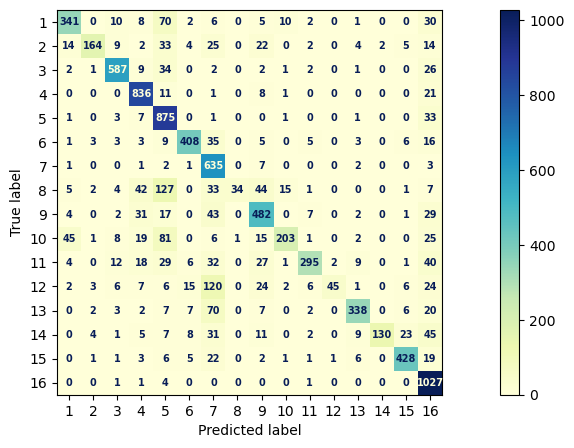

In [12]:
X_train_count_vectorizer = CountVectorizer(ngram_range=(1,2), stop_words = "english" )
X_train_count_vectorizer.fit(X_train)  
X_train_count_vector = X_train_count_vectorizer.transform(X_train) 
X_test_count_vector = X_train_count_vectorizer.transform(X_test) 

count_multinomialNB_clf = MultinomialNB().fit(X_train_count_vector, y_train)
y_pred = count_multinomialNB_clf.predict(X_test_count_vector)

fig, ax = plt.subplots(figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax, cmap=mpl.colormaps["YlGnBu"])
print(metrics.classification_report(y_test,y_pred))
print("accuracy = {:.4}".format(metrics.accuracy_score(y_test, y_pred)))
print("macro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'macro')))
print("macro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'macro')))
print("weighted-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'weighted')))
print("weighted-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'weighted')))
print("micro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'micro')))
print("micro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'micro')))


from the above, it looks like using both unigram and bigram performed better than using only bigram

### tfidf vector with multinomialNB

              precision    recall  f1-score   support

           1       0.90      0.51      0.65       485
           2       0.98      0.19      0.32       300
           3       0.94      0.81      0.87       667
           4       0.73      0.96      0.83       878
           5       0.48      0.95      0.64       922
           6       0.94      0.58      0.72       497
           7       0.49      0.96      0.65       652
           8       1.00      0.00      0.01       315
           9       0.83      0.64      0.73       618
          10       0.91      0.20      0.33       407
          11       0.95      0.39      0.55       476
          12       1.00      0.03      0.05       267
          13       0.95      0.54      0.69       464
          14       0.98      0.16      0.27       276
          15       0.90      0.72      0.80       496
          16       0.57      0.99      0.73      1034

    accuracy                           0.67      8754
   macro avg       0.85   

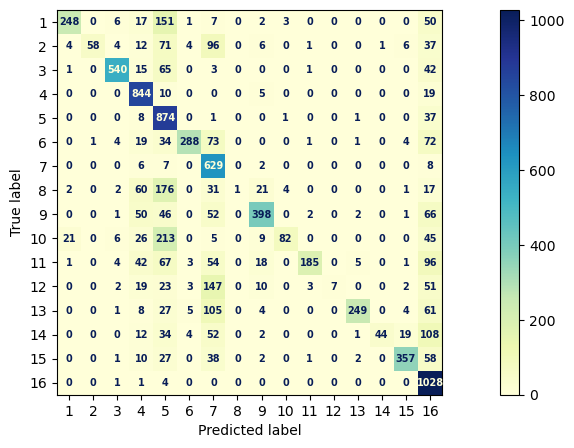

In [13]:
X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = "english" )
X_train_tfidf_vectorizer.fit(X_train)
X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train) 
X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test) 

tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)
y_pred = tfidf_multinomialNB_clf.predict(X_test_tfidf_vector)

print(metrics.classification_report(y_test,y_pred))
print("accuracy = {:.4}".format(metrics.accuracy_score(y_test, y_pred)))
print("macro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'macro')))
print("macro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'macro')))
print("weighted-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'weighted')))
print("weighted-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'weighted')))
print("micro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'micro')))
print("micro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'micro')))

fig, ax = plt.subplots(figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax,cmap=mpl.colormaps["YlGnBu"])


using multinomialNB on tfidf vectors seems to perform worse

 - let's run one more using tfidf but with bigram only

              precision    recall  f1-score   support

           1       0.89      0.51      0.65       485
           2       0.97      0.10      0.18       300
           3       0.94      0.77      0.85       667
           4       0.68      0.95      0.79       878
           5       0.46      0.96      0.62       922
           6       0.95      0.53      0.68       497
           7       0.63      0.92      0.75       652
           8       1.00      0.02      0.04       315
           9       0.84      0.50      0.62       618
          10       0.92      0.22      0.35       407
          11       0.96      0.29      0.45       476
          12       1.00      0.01      0.01       267
          13       0.94      0.54      0.69       464
          14       1.00      0.03      0.06       276
          15       0.93      0.54      0.68       496
          16       0.43      0.99      0.60      1034

    accuracy                           0.62      8754
   macro avg       0.85   

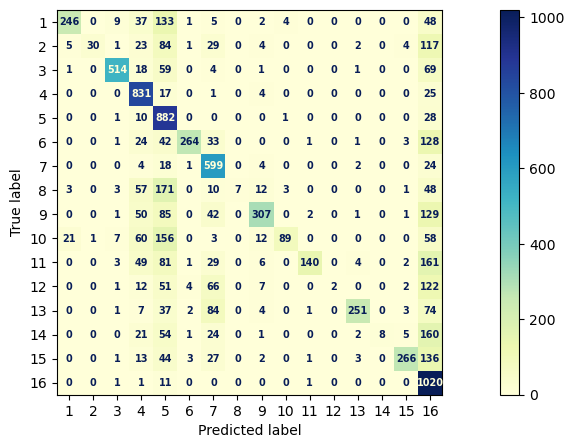

In [14]:
X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_tfidf_vectorizer.fit(X_train)
X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train) 
X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test) 

tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)
y_pred = tfidf_multinomialNB_clf.predict(X_test_tfidf_vector)

print(metrics.classification_report(y_test,y_pred))
print("accuracy = {:.4}".format(metrics.accuracy_score(y_test, y_pred)))
print("macro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'macro')))
print("macro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'macro')))
print("weighted-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'weighted')))
print("weighted-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'weighted')))
print("micro-averaged precision = {:.4}".format(metrics.precision_score(y_test, y_pred, average = 'micro')))
print("micro-averaged recall = {:.4}".format(metrics.recall_score(y_test, y_pred, average = 'micro')))

fig, ax = plt.subplots(figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, text_kw=font, ax=ax,cmap=mpl.colormaps["YlGnBu"])


multinomialNB on ifidf vector performed the same on unigram + bigram, or bigram only
 - 
 Re-run the above cells to compare performances with different parameters
  - multinomialNB on count vectors of bigram only
  - multinomialNB on count vectors of unigram and bigram
  - multinomialNB on tfidf vectors of unigram and bigram
  - multinomialNB on tfidf vectors of bigram only

any conclusion is specific to this corpus, not to be generalized

### looking at the most informative features

In [15]:
X_train_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_tfidf_vectorizer.fit(X_train)
labels = X_train_tfidf_vectorizer.get_feature_names_out()

X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train)
X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test)

tfidf_multinomialNB_clf = MultinomialNB().fit(X_train_tfidf_vector, y_train)

* feature_log_prob_ is ndarray of shape (n_classes, n_features), producing the empirical log probability of features given a class, P(x_i | y)
* tfidf_multinomialNB_clf.classes_ produces the class labels known to the classifier, tfidf_multinomialNB_clf.classes_[0] is 1, meaning SDG 1.
so we know the arrangement of the results in the order of sdg_num. 
* tfidf_multinomialNB_clf.feature_log_prob_[0] gives the empirical probabilities (log) of each feature given class SDG 1. 

In [16]:
tfidf_multinomialNB_clf.classes_[0:16]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
tfidf_multinomialNB_clf.feature_log_prob_.shape

(16, 633464)

In [18]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    for labelid in classlabel:
        feature_names = vectorizer.get_feature_names_out()
        top_n = sorted(zip(classifier.feature_log_prob_[labelid], feature_names), reverse=True)[:n]
        for coef, feat in top_n:
            print("SDG {} : {:30}  {:.6}".format(labelid+1, feat, coef))
        print("")

In [19]:
most_informative_feature_for_class(X_train_tfidf_vectorizer,tfidf_multinomialNB_clf, [0, 13], n = 20)

SDG 1 : child poverty                   -10.7464
SDG 1 : poverty line                    -10.8794
SDG 1 : poverty rate                    -10.9931
SDG 1 : extreme poverty                 -11.0763
SDG 1 : social protection               -11.1429
SDG 1 : poverty rates                   -11.1767
SDG 1 : poverty reduction               -11.2405
SDG 1 : percentage points               -11.4875
SDG 1 : monetary poverty                -11.4988
SDG 1 : multidimensional poverty        -11.5478
SDG 1 : relative poverty                -11.6054
SDG 1 : rural areas                     -11.6878
SDG 1 : income distribution             -11.7725
SDG 1 : low income                      -11.8154
SDG 1 : absolute poverty                -11.852
SDG 1 : material deprivation            -11.8672
SDG 1 : world bank                      -11.8754
SDG 1 : poverty lines                   -11.8816
SDG 1 : poor children                   -11.8885
SDG 1 : social assistance               -11.9143

SDG 14 : fish stocks

In [20]:
X_train_count_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = "english" )
X_train_count_vectorizer.fit(X_train)  
X_train_count_vector = X_train_count_vectorizer.transform(X_train) 
X_test_count_vector = X_train_count_vectorizer.transform(X_test) 

count_multinomialNB_clf = MultinomialNB().fit(X_train_count_vector, y_train)
most_informative_feature_for_class(X_train_count_vectorizer,count_multinomialNB_clf, [0, 13], n = 20)

SDG 1 : child poverty                   -8.43785
SDG 1 : poverty line                    -8.55987
SDG 1 : poverty rate                    -8.68148
SDG 1 : social protection               -8.8501
SDG 1 : extreme poverty                 -8.8501
SDG 1 : poverty rates                   -8.91328
SDG 1 : poverty reduction               -8.99241
SDG 1 : percentage points               -9.131
SDG 1 : monetary poverty                -9.39201
SDG 1 : rural areas                     -9.40971
SDG 1 : multidimensional poverty        -9.48382
SDG 1 : relative poverty                -9.52304
SDG 1 : low income                      -9.54325
SDG 1 : world bank                      -9.56386
SDG 1 : income distribution             -9.60642
SDG 1 : et al                           -9.6974
SDG 1 : economic growth                 -9.72149
SDG 1 : household income                -9.79748
SDG 1 : urban areas                     -9.85155
SDG 1 : social assistance               -9.85155

SDG 14 : et al          

In [21]:
most_informative_feature_for_class(X_train_count_vectorizer,count_multinomialNB_clf, [8], n = 20)
most_informative_feature_for_class(X_train_tfidf_vectorizer,tfidf_multinomialNB_clf, [8], n = 20)

SDG 9 : developing countries            -8.53497
SDG 9 : private sector                  -9.22085
SDG 9 : new technologies                -9.36061
SDG 9 : science technology              -9.58375
SDG 9 : mobile broadband                -9.58375
SDG 9 : sustainable development         -9.62631
SDG 9 : economic growth                 -9.67076
SDG 9 : cross border                    -9.74138
SDG 9 : long term                       -9.79139
SDG 9 : rural areas                     -9.84404
SDG 9 : et al                           -9.87143
SDG 9 : public private                  -9.89961
SDG 9 : united states                   -9.92859
SDG 9 : public sector                   -9.92859
SDG 9 : developed countries             -9.92859
SDG 9 : aid trade                       -9.95845
SDG 9 : world bank                      -9.98922
SDG 9 : technology innovation           -9.98922
SDG 9 : infrastructure development      -9.98922
SDG 9 : income countries                -10.021

SDG 9 : developing c

### observation on computation cost on toarray or not
 - when doing
    X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train)

    X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test)

 - vs. doing

    X_train_tfidf_vector = X_train_tfidf_vectorizer.transform(X_train).toaray()

    X_test_tfidf_vector = X_train_tfidf_vectorizer.transform(X_test).toarray()
    
 - adding .toarray() make the model fitting and prediction much slower
 - the former (without toarray()) is about 10 second, on (2, 2) tfidf
 - the later is about 5 minutes

In [22]:
def print_top_n_features(vectorizer, clf, class_labels, n=10):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    for i, class_label in enumerate(class_labels):
        top_n = np.argsort(clf.feature_log_prob_[i])[::-1][:n]
        print("%s: %s" % (class_label,
              " || ".join(feature_names[j] for j in top_n)))

In [23]:
print_top_n_features(X_train_tfidf_vectorizer,tfidf_multinomialNB_clf,[0,1,2,3,4,5,6,7,8,9,10],n=20)

0: child poverty || poverty line || poverty rate || extreme poverty || social protection || poverty rates || poverty reduction || percentage points || monetary poverty || multidimensional poverty || relative poverty || rural areas || income distribution || low income || absolute poverty || material deprivation || world bank || poverty lines || poor children || social assistance
1: food security || food insecurity || developing countries || price volatility || agricultural production || agricultural sector || food production || food prices || agricultural research || climate change || self sufficiency || agricultural productivity || agricultural products || world food || agro food || food agriculture || price support || agricultural land || world bank || viet nam
2: health care || primary care || mental health || health services || et al || public health || life expectancy || oecd countries || care services || health insurance || long term || quality care || health spending || chronic d